### ENSIMAG – Grenoble INP – UGA - Academic year 2025-2026
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2026-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Isabella Costa Maia -- `isabella.costa-maia@grenoble-inp.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [469]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


df = pd.read_csv("prostate.data", sep="\t")

df = df.drop(columns=[df.columns[0], df.columns[-1]])

df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

``` 
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None: # verify if figsize is provided when the function is called
        figsize = (7.10, 6.70) # create default tuple of figsize, if not provided
    n_vars = df.shape[1] # get numbers of variables

    # Creates a figure of the specified size and an n_vars × n_vars grid of subplots
    # fig is the overall figure object
    # ax is a 2D array of individual axes objects, one per cell in the grid
    
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars) 
    
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95) # Adjust the subplot layout parameters

    # terate over every combination of variables
    for i in range(n_vars):
        for j in range(n_vars):
            
            axij = ax[i][j] # Accessing vars (i,j) subplot
            i_name = df.columns[i] # get var i name
            j_name = df.columns[j] # get var j name

            # Removing tick marks
            axij.set_xticks([])
            axij.set_yticks([])
            
            axij.margins(0.1) # Adding margins
            # When the row and column indices differ (we are not on the diagonal), a scatter plot is drawn
            # with variable j on the x-axis and variable i on the y-axis
            
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                # on diagonal, display the variable name
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()
```

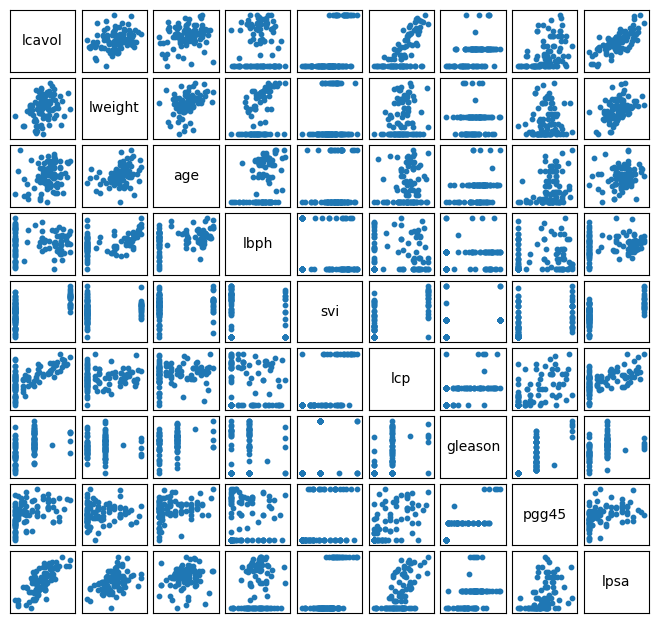

In [470]:
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()

**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

By observing the pairplot, **lpsa** strongly correlates with **lcavol** because we can observe a clear linear upward trend of the point cluster. For **lcp**, we also observe a strong positive correlation despite a clusteer of point at the lower end, possibly due to a value limit. For **lweight** and **pgg45**, there is a clear positive correlation, though it appears slightly less strong than with **lpsa** and **lcp**bp

## Inferred datatype for each predictor:
- **lcavol**: continuous
- **lweight**: continuous
- **age**: continuous
- **lbph**: continuous
- **svi**: binary
- **lcp**: continuous
- **gleason**: discrete
- **pgg45**: continuous
- **lpsa**: continuous

**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

# The formula of correlation between two vectors X and Y

$$
\text{Cor}(X, Y) = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}
$$



In [471]:
def correlation(x_name, y_name):
    X, Y = df[x_name].to_numpy(), df[y_name].to_numpy()

    x_len, y_len = len(X), len(Y)

    x_mean, y_mean = X.mean(), Y.mean()
    num = np.sum((X-x_mean) * (Y-y_mean))

    denom = np.sqrt(np.sum(np.power(X-x_mean,2))) * np.sqrt(np.sum(np.power(Y-y_mean,2)))

    return num / denom if denom != 0 else np.nan

cols = df.columns
my_corr_matrix = pd.DataFrame(index=cols, columns=cols)


for x_col in cols:
    for y_col in cols:

        coef = correlation(x_col, y_col)
    
        my_corr_matrix.loc[x_col, y_col] = coef

my_corr_matrix = my_corr_matrix.astype(float)

coef = correlation('age', 'age')

my_corr_matrix - df.corr()
    

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,0.000000e+00,3.330669e-16,2.220446e-16,-1.734723e-17,-2.220446e-16,-2.220446e-16,-6.106227e-16,-1.665335e-16,0.000000e+00
lweight,3.330669e-16,-2.220446e-16,3.330669e-16,-1.110223e-16,2.220446e-16,3.053113e-16,-5.065393e-16,1.804112e-16,2.775558e-16
age,2.220446e-16,3.330669e-16,0.000000e+00,-5.551115e-17,1.526557e-16,1.110223e-16,-2.220446e-16,1.665335e-16,2.220446e-16
lbph,-1.734723e-17,-1.110223e-16,-5.551115e-17,2.220446e-16,1.387779e-17,-5.204170e-17,-4.440892e-16,-2.775558e-17,-1.665335e-16
svi,-2.220446e-16,2.220446e-16,1.526557e-16,1.387779e-17,-2.220446e-16,-2.220446e-16,-4.440892e-16,0.000000e+00,-1.110223e-16
lcp,-2.220446e-16,3.053113e-16,1.110223e-16,-5.204170e-17,-2.220446e-16,0.000000e+00,-4.440892e-16,-2.220446e-16,-1.110223e-16
gleason,-6.106227e-16,-5.065393e-16,-2.220446e-16,-4.440892e-16,-4.440892e-16,-4.440892e-16,2.220446e-16,1.110223e-16,-1.054712e-15
pgg45,-1.665335e-16,1.804112e-16,1.665335e-16,-2.775558e-17,0.000000e+00,-2.220446e-16,1.110223e-16,0.000000e+00,-3.885781e-16
lpsa,0.000000e+00,2.775558e-16,2.220446e-16,-1.665335e-16,-1.110223e-16,-1.110223e-16,-1.054712e-15,-3.885781e-16,-1.110223e-16


There are no major differences between two functions except for the floating point rounding errors handled by Pandas and Numpy.

/home/samir/anaconda3/envs/isla2026/lib/python3.14/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


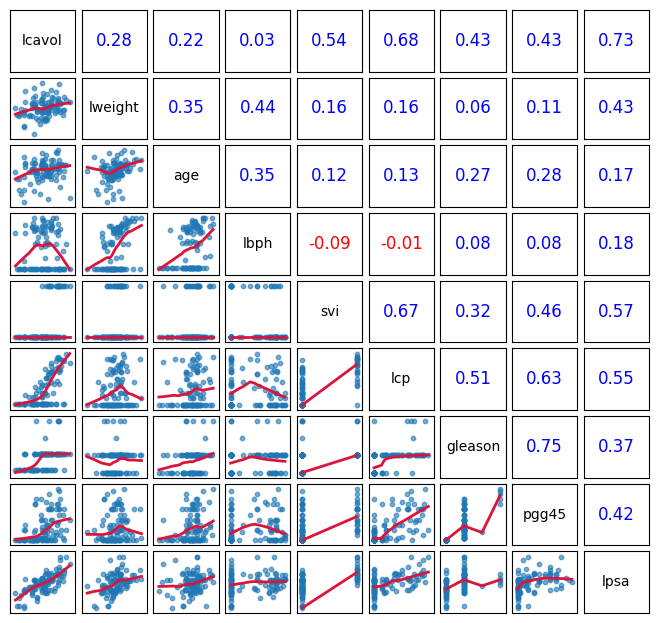

In [472]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

def pairplot2(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
        
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            
            if i == j:
                axij.text(0.5, 0.5, i_name,
                          horizontalalignment='center',
                          verticalalignment='center',
                          transform=axij.transAxes)
                          
            elif i < j:
                corr_val = correlation(i_name,j_name)
                
                text_color = 'blue' if corr_val >= 0 else 'red'
                
                axij.text(0.5, 0.5, f"{corr_val:.2f}", fontsize=12,
                          horizontalalignment='center',
                          verticalalignment='center',
                          transform=axij.transAxes,
                          color=text_color)
                          
            else: # i > j
                x = df[j_name].to_numpy()
                y = df[i_name].to_numpy()
                
                axij.scatter(x, y, s=10, alpha=0.6)
                
                smoothed = lowess(endog=y, exog=x, frac=0.6)
                axij.plot(smoothed[:, 0], smoothed[:, 1], color='crimson', linewidth=2)

    return fig, ax

fig, ax = pairplot2(df)
plt.show()

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters. 

$$\texttt{lcavol} = \beta_0 + \beta_1\textbf{lpsa} + \beta_2\textbf{lweight} + \beta_3\textbf{age} + \beta_4\textbf{lbph} + \beta_5\textbf{svi} + \beta_6\textbf{lcp} + \beta_7\textbf{gleason} + \beta_8\textbf{pgg45} + \varepsilon$$

Where: $\beta_0$ is the intercept, $\beta_1\ldots\beta_8$ are the regression coefficients, and $\varepsilon \sim \mathcal{N}(0, \sigma^2)$ is the error term. 

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?
- Why did we drop two columns after the encoding?
- Why did we add a column of ones to the dataframe?

# Answers
- Because Linear regression requires numerical arrays of floating-point type
- Because keeping all dummy variables for a categorical feature plus an intercept creates perfect multicollinearity (the dummy variable trap). For example, for svi we would have svi_0 + svi_1 = 1 for every row, so one column is redundant. Same idea for gleason: we keep one category as the reference (here gleason_6) and drop its dummy column. This makes the matrix invertible and the coefficients identifiable and defines a reference for interpretation.
- To include the intercept

In [473]:
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")

# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']

**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

- Comment the overall results of the regression as well.

In [474]:
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        15:05:00   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.958      -0.432       0.409
age            0.0248      0.011      2.205      0.030       0.002       0.047
lbph          -0.1042      0.058     -1.790      0.077      -0.220       0.012
lcp            0.4028      0.085      4.734      0.000       0.234       0.572
pgg45         -0.0094      0.005     -2.080      0.040      -0.018      -0.000
lpsa           0.5496      0.090      6.100      0.000       0.370       0.729
svi_1         -0.2204      0.256     -0.860      0.392      -0.730       0.289
gleason_7      0.3117      0.215      1.448      0.151      -0.116       0.740
gleason_8     -0.7106      0.759     -0.936      0.352      -2.219       0.798
gleason_9      0.7901      0.488      1.621      0.109      -0.179       1.759
intercept     -1.4067      0.874     -1.609      0.111      -3.145       0.332
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.127
Skew:                          -0.073   Prob(JB):                        0.939
Kurtosis:                       2.900   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **Coefficients for `svi` and `gleason`**:  
Since we applied one-hot encoding, these coefficients represent differences **relative to a reference category** (`gleason_6`). For example, `svi_1` measures the average change in `lcavol` compared to the baseline category (`svi_0`), holding other variables constant. Similarly, `gleason_7`, `gleason_8`, and `gleason_9` measure differences relative to the reference Gleason score.

- **Without one-hot encoding**:  
If we had treated `svi` and `gleason` as numeric variables, the regression would incorrectly assume a **linear ordered effect** between categories. If we had included all dummy variables without dropping one, we would face **perfect multicollinearity (dummy variable trap)**.

- **Overall regression results**:  
The model is globally significant (very small F-test p-value).  
With \(R^2 = 0.686\), the fit is reasonably good.  
Variables such as `lcp`, `lpsa`, `age`, and `pgg45` are statistically significant, while several `gleason` and `svi` dummies are not, suggesting limited additional explanatory power from those categories.

**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [475]:
confidence = results.conf_int(alpha=0.05)
confidence

,0,1
lweight,-0.431600,0.409107
age,0.002436,0.047129
lbph,-0.219914,0.011515
lcp,0.233639,0.571880
pgg45,-0.018469,-0.000419
lpsa,0.370474,0.728673
svi_1,-0.730029,0.289190
gleason_7,-0.116263,0.739616
gleason_8,-2.219087,0.797911
gleason_9,-0.179004,1.759273


- A coefficient is statistically significant at the 5% level if its 95% confidence interval **does not contain 0**.

- The intervals for `age` [0.002 ; 0.047], `lcp` [0.234 ; 0.572], `pgg45` [-0.018 ; -0.0004], and `lpsa` [0.370 ; 0.729] do not include 0 → these variables are statistically significant.

- The intervals for `lweight`, `lbph`, `svi_1`, and all `gleason` dummies include 0 → these effects are not statistically significant at the 5% level.

- This confirms the previous results from the p-values: only a subset of predictors has a clear linear effect on `lcavol`, while the categorical variables (`svi`, `gleason`) do not significantly improve the model.

**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

In [476]:
results.pvalues

lweight      9.577075e-01
age          3.014993e-02
lbph         7.695609e-02
lcp          8.577858e-06
pgg45        4.047741e-02
lpsa         2.939241e-08
svi_1        3.922717e-01
gleason_7    1.512950e-01
gleason_8    3.516744e-01
gleason_9    1.087313e-01
intercept    1.113676e-01
dtype: float64

- The coefficient of `lpsa` is positive (≈ 0.55), meaning that an increase in `lpsa` is associated with an increase in `lcavol`, holding other variables constant.

- The p-value for `lpsa` is extremely small (p < 0.001), so we reject the null hypothesis $$(H_0 : \beta_{lpsa} = 0)$$ at the 5% level. This indicates a statistically significant effect.

- The 95% confidence interval for `lpsa` (≈ [0.37 ; 0.73]) does not include 0, which confirms the hypothesis test result.

- Therefore, `lpsa` has a strong, positive, and statistically significant effect on `lcavol`.

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

In [477]:
from scipy import stats
def fit(X, y):
    X_arr = X.values
    y_arr = y.values
    # beta = (X^T X)^{-1} X^T y
    beta = np.linalg.solve(X_arr.T @ X_arr, X_arr.T @ y_arr)
    n, p = X_arr.shape
    y_hat = X_arr @ beta
    residuals = y_arr - y_hat
    rss = residuals @ residuals
    sigma2 = rss/(n-p)
    var_beta = sigma2*np.linalg.inv(X_arr.T @ X_arr)
    se = np.sqrt(np.diag(var_beta))
    t_stats = beta/se
    p_values = 2*(1-stats.t.cdf(np.abs(t_stats), df=n-p))
    return pd.DataFrame({'beta': beta, 'std err': se, 't': t_stats, 'p-values': p_values}, index=X.columns)

print(fit(X, y))

               beta   std err         t      p-values
lweight   -0.011246  0.211453 -0.053185  9.577075e-01
age        0.024782  0.011241  2.204628  3.014993e-02
lbph      -0.104200  0.058209 -1.790107  7.695609e-02
lcp        0.402760  0.085074  4.734252  8.577858e-06
pgg45     -0.009444  0.004540 -2.080263  4.047741e-02
lpsa       0.549573  0.090093  6.100047  2.939241e-08
svi_1     -0.220419  0.256351 -0.859833  3.922717e-01
gleason_7  0.311676  0.215268  1.447850  1.512950e-01
gleason_8 -0.710588  0.758827 -0.936429  3.516744e-01
gleason_9  0.790135  0.487510  1.620755  1.087313e-01
intercept -1.406654  0.874455 -1.608606  1.113676e-01


### Bonus EXPLANATION

`numpy.linalg.inv` explicitly computes the matrix inverse, which is **numerically less stable and less efficient**.

`numpy.linalg.solve` is preferable because it directly solves the linear system

$$
(X^T X)\beta = X^T y
$$

without computing the inverse, leading to **better numerical accuracy and performance**, especially when matrices are ill-conditioned.

**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

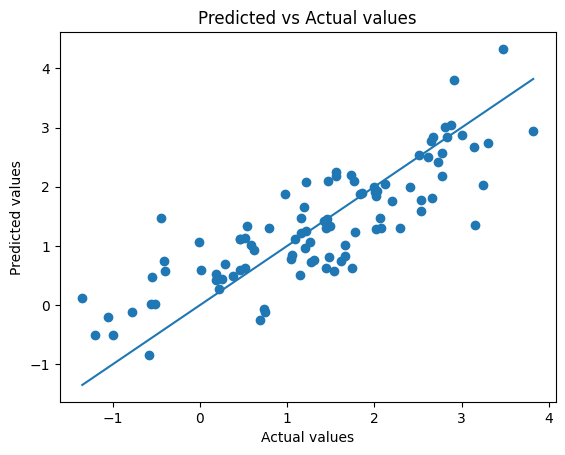

In [478]:
predictions = results.get_prediction(X).predicted_mean
plt.scatter(y, predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values')
plt.show()

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

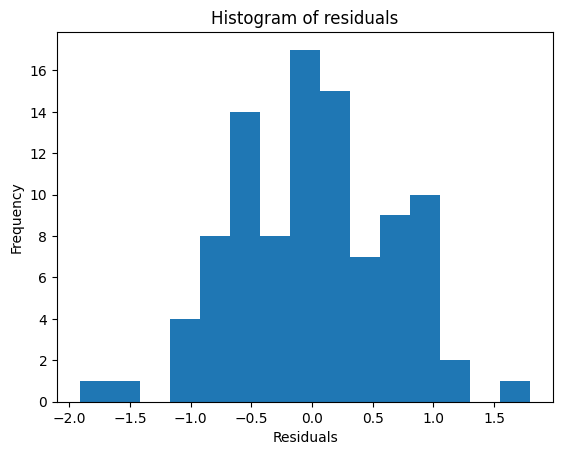

<Figure size 640x480 with 0 Axes>

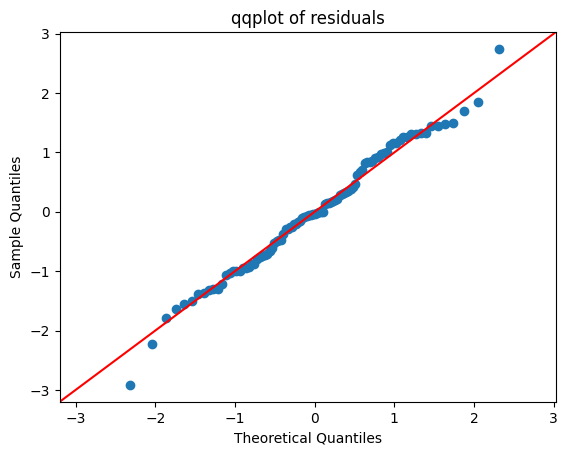

RSS: 41.81406860804535


In [479]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residuals 
resid = results.resid

# Histogram of residuals
plt.figure()
plt.hist(resid, bins=15)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of residuals")
plt.show()

# plot of residuals
plt.figure()
sm.qqplot(resid, line="45", fit=True)
plt.title("qqplot of residuals")
plt.show()

# Residual Sum of Squares (RSS)
RSS = float(np.sum(np.square(resid)))
print(f"RSS: {RSS}")

- The histogram of residuals appears roughly symmetric and centered around 0, suggesting approximate normality.

- The QQ-plot shows points lying close to the 45° line, with only small deviations in the tails. This indicates that the normality assumption is reasonably satisfied.

- Therefore, we can admit that the residuals are approximately normally distributed, although slight departures may exist at the extremes.


**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

In [480]:
X2 = X.drop(columns=["lpsa", "lcp"])
model2 = sm.OLS(y, X2)
results2 = model2.fit()
print(results2.summary())
def rss(res):
    return float(np.sum(res.resid**2))
print("Original:  R2 =", results.rsquared, "New R2 =", results.rsquared_adj, "RSS =", rss(results))
print("Without lpsa,lcp: R2 =", results2.rsquared, "New R2 =", results2.rsquared_adj, "RSS =", rss(results2))

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     8.390
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           2.11e-08
Time:                        15:05:01   Log-Likelihood:                -125.58
No. Observations:                  97   AIC:                             269.2
Df Residuals:                      88   BIC:                             292.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight        0.5850      0.259      2.257      0.0

- After removing `lpsa` and `lcp`, the model fit deteriorates substantially:  
  \( R^2 \) drops from about 0.686 to 0.433 and adjusted \( R^2 \) from about 0.650 to 0.381.

- The RSS increases strongly (from ≈ 41.8 to ≈ 75.7), meaning the unexplained variability almost doubles.

- Although the model remains globally significant (small F-test p-value), it explains much less variability in `lcavol`.

- This shows that `lpsa` and `lcp` were major contributors to the explanatory power of the model, especially `lpsa`, which was highly significant before.

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

In [481]:
# Question a
# 8 predictors (model size k is counted here)
predictors = ["lweight", "age", "lbph", "lcp", "pgg45", "lpsa", "svi", "gleason"]
# Map each predictor to its actual columns in X (encoded)
colmap = {
    "lweight": ["lweight"],
    "age": ["age"],
    "lbph": ["lbph"],
    "lcp": ["lcp"],
    "pgg45": ["pgg45"],
    "lpsa": ["lpsa"],
    "svi": [c for c in X.columns if c.startswith("svi_")],
    "gleason": [c for c in X.columns if c.startswith("gleason_")],
}
def fit_rss(pred_list):
    cols = ["intercept"]
    for p in pred_list:
        cols += colmap[p]
    Xsub = X[cols]
    res = sm.OLS(y, Xsub).fit()
    return float(np.sum(res.resid**2))

k = 2
rows = []
for comb in itertools.combinations(predictors, k):
    rows.append({"predictors": comb, "RSS": fit_rss(comb)})
rss_k2 = pd.DataFrame(rows).sort_values("RSS")
rss_k2.head(10)

,predictors,RSS
19,"(lcp, lpsa)",47.278097
26,"(lpsa, gleason)",56.945743
25,"(lpsa, svi)",58.452188
22,"(pgg45, lpsa)",58.946250
15,"(lbph, lpsa)",59.909789
10,"(age, lpsa)",60.035697
4,"(lweight, lpsa)",61.187121
21,"(lcp, gleason)",67.816146
2,"(lweight, lcp)",68.607649
8,"(age, lcp)",69.930206


In [482]:
# Model having the smallest RSS:
rss_k2.iloc[0]

predictors    (lcp, lpsa)
RSS             47.278097
Name: 19, dtype: object

Best model of size 2: ('lcp', 'lpsa') with RSS 47.28
Best model of size 0: () with RSS 133.36
Best model of size 1: ('lpsa',) with RSS 61.42
Best model of size 2: ('lcp', 'lpsa') with RSS 47.28
Best model of size 3: ('age', 'lcp', 'lpsa') with RSS 46.24
Best model of size 4: ('age', 'lbph', 'lcp', 'lpsa') with RSS 44.88
Best model of size 5: ('age', 'lbph', 'lcp', 'pgg45', 'lpsa') with RSS 44.31
Best model of size 6: ('age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_8') with RSS 43.78
Best model of size 7: ('age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_7', 'gleason_9') with RSS 42.47
Best model of size 8: ('age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_7', 'gleason_8', 'gleason_9') with RSS 42.17


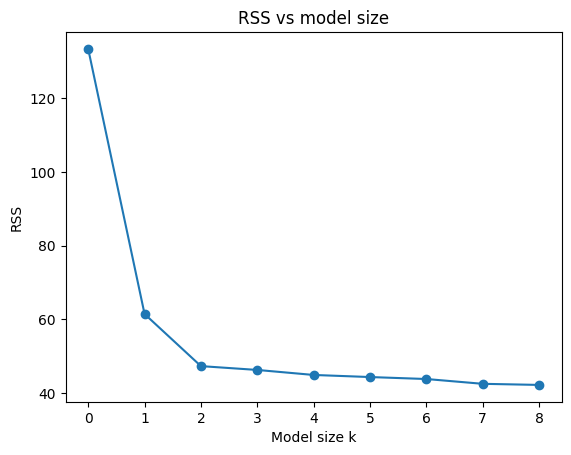

In [483]:
# Question b
predictors = list(X.columns.drop('intercept')) # the 8 real predictors

def compute_rss(X,y,subset):
    cols = list(subset) + ['intercept']
    model = sm.OLS(y, X[cols]).fit()
    return model.ssr
results_k2 = {}
for combo in itertools.combinations(predictors, 2):
    results_k2[combo] = compute_rss(X, y, combo)

best_k2 = min(results_k2, key=results_k2.get)
print(f'Best model of size 2: {best_k2} with RSS {results_k2[best_k2]:.2f}')

# b) Best subset for each k, plot RSS and k

best_subsets = {}

for k in range(0,9):
    best_rss = np.inf
    best_combo = ()
    combos = itertools.combinations(predictors, k) if k > 0 else [()]
    for combo in combos:
        rss = compute_rss(X, y, combo)
        if rss < best_rss:
            best_rss = rss
            best_combo = combo
    best_subsets[k] = {'predictors' : best_combo, 'rss' : best_rss}
    print(f'Best model of size {k}: {best_combo} with RSS {best_rss:.2f}')

# plot
plt.plot(list(best_subsets.keys()), [v['rss'] for v in best_subsets.values()], marker='o')
plt.xlabel("Model size k")
plt.ylabel("RSS")
plt.title("RSS vs model size")
plt.show()

### (c) Is minimizing RSS a good way to choose the optimal model size?

Minimizing the RSS is **not appropriate** for selecting the optimal model size because the RSS **always decreases** when additional predictors are included.  

This mechanically favors larger models and may lead to **overfitting**.

## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

### (a) Brief overview of split-validation

Split-validation consists of dividing the dataset into two parts:
- a **training set**, used to estimate the model parameters,
- a **test (validation) set**, used to evaluate prediction performance.

The model is fitted only on the training data, and the prediction error is computed on unseen test data.  

Unlike RSS minimization on the full dataset, this method evaluates **out-of-sample performance**, which reduces the risk of overfitting. Therefore, it does not systematically favor larger models.


In [484]:
# Question b

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

train_errors, test_errors = [], []
for k in range(0,9):
    cols = list(best_subsets[k]['predictors']) + ['intercept']
    model = sm.OLS(y_train, x_train[cols]).fit()
    train_pred = model.predict(x_train[cols])
    test_pred = model.predict(x_test[cols])
    train_errors.append(np.mean((train_pred - y_train)**2))
    test_errors.append(np.mean((test_pred - y_test)**2))



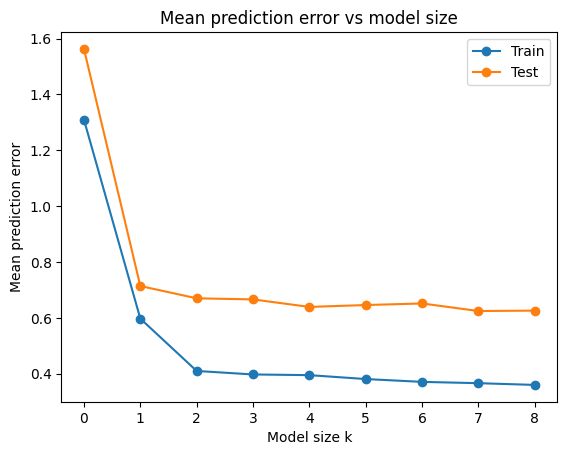

In [485]:
plt.plot(range(9), train_errors, marker="o", label='Train')
plt.plot(range(9), test_errors, marker="o", label='Test')
plt.xlabel('Model size k')
plt.ylabel('Mean prediction error')
plt.title('Mean prediction error vs model size')
plt.legend()
plt.show()

In [486]:
best_k = np.argmin(test_errors)
print(f'Best model size: {best_k}, predictors: {best_subsets[best_k]["predictors"]}')

best_cols = list(best_subsets[best_k]['predictors']) + ['intercept']
best_model = sm.OLS(y, X[best_cols]).fit()
print(best_model.summary())

Best model size: 7, predictors: ('age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_7', 'gleason_9')
                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     27.21
Date:                Tue, 24 Feb 2026   Prob (F-statistic):           1.33e-19
Time:                        15:05:02   Log-Likelihood:                -97.584
No. Observations:                  97   AIC:                             211.2
Df Residuals:                      89   BIC:                             231.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

### (c) Model choice Explanation

The best model is the one that minimizes the **test error**, not the training error.  

Typically:
- Training error decreases as model size increases.
- Test error decreases at first, then increases if the model becomes too complex (overfitting).

Thus, we select the model size \( k = 7 \) that achieves the **lowest validation error**, and then refit this model on the full dataset to obtain the final parameter estimates.


### (d) Main limitation of split-validation

The main limitation is that the results depend on the **random split** of the data.  
Different splits can lead to different selected models and different error estimates, especially with small datasets.

To address this issue, we can use **cross-validation (K-fold cross-validation)**, which:
- splits the data into multiple folds,
- trains and evaluates the model multiple times,
- averages the prediction errors.

This provides a more stable and reliable estimate of prediction performance.

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.

### Conclusion

From the validation curve, the test error decreases sharply when moving from very small models to medium-sized models, and then stabilizes. The minimum test MSE is achieved for **k = 8**, which corresponds to the subset:

`('age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_7', 'gleason_9')`.

This suggests that, for this particular train/test split, the largest model provides the best predictive performance. Unlike the training error, which decreases monotonically, the test error captures generalization performance and justifies selecting this model.

However, since the differences in test error for large values of \( k \) are small, the improvement over simpler models is limited. Given the small sample size, the selected model may be sensitive to the specific split, and cross-validation would provide a more reliable model choice.